In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('savedResults/run_10/allTrainLosses.pickle', 'rb') as f:
    losses = pickle.load(f)
print(losses)

[[  0.00000000e+00   1.00000000e-02   2.00000000e-02   3.00000000e-02
    4.00000000e-02   4.00000000e-02   5.00000000e-02   6.00000000e-02
    7.00000000e-02   8.00000000e-02   9.00000000e-02   1.00000000e-01]
 [  2.00000000e+01   8.06447362e-05   6.14747678e-05   5.01562389e-05
    5.13358966e-05   5.13358966e-05   4.70356219e-05   4.00623286e-05
    3.80621149e-05   3.86296576e-05   3.73110283e-05   3.64603714e-05]
 [  3.00000000e+01   1.11252252e-04   8.86568360e-05   7.57341840e-05
    7.50911291e-05   7.50911291e-05   6.33106959e-05   5.69130123e-05
    5.48750243e-05   5.62725814e-05   5.55799556e-05   5.43138261e-05]
 [  4.00000000e+01   2.41615471e-04   1.62236295e-04   2.39354953e-04
    1.72896820e-04   1.72896820e-04   1.34607339e-04   9.87555455e-05
    1.42074543e-04   1.05810874e-04   7.62061845e-05   1.95932107e-04]
 [  5.00000000e+01   4.79599305e-03   3.08372787e-03   1.33062237e-03
    7.77203995e-04   7.77203995e-04   5.39580210e-04   3.43501671e-04
    2.98561631e-

In [2]:
# Only use this for run 1, where the data about the sequence length and weight std was not stored with the losses

# err = np.zeros((len(losses) + 1, len(losses[0]) + 1))

# nPoints = [10,20,30,40,50,60]
# wsd2 = [0.03, 0.06, 0.09, 0.12, 0.15]

# for i in range(len(losses)):
#     err[i+1][0] = nPoints[i]
#     for j in range(len(losses[0])):
#         err[0][j + 1] = wsd2[j]
#         err[i+1][j+1] = losses[i][j]

# print(err)

In [18]:
# 
err = losses

In [12]:
print(np.sqrt(err[0][1:]**2 * 128))

[ 0.11313708  0.22627417  0.33941125  0.45254834  0.56568542  0.67882251
  0.79195959  0.90509668  1.01823376  1.13137085]


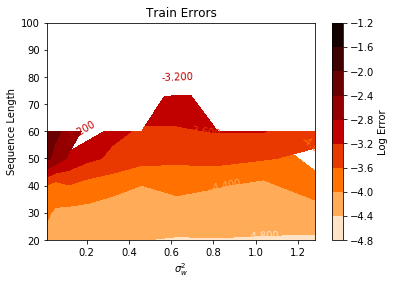

In [19]:
%matplotlib inline

import matplotlib.cm as cm
plt.figure()
cmap = cm.get_cmap('gist_heat_r')
cp = plt.contourf(err[0][1:]**2 * 128, err[...,0][1:], np.log10(err[...,1:][1:,...]),
                 cmap = cmap)
plt.colorbar(cp).set_label('Log Error')
plt.clabel(cp, inline=True, fontsize = 10)
plt.title("Train Errors")
plt.xlabel(r'$\sigma_w^2$')
plt.ylabel("Sequence Length")

In [20]:
with open('savedResults/run_11/allTrainLosses.pickle', 'rb') as f:
    losses = pickle.load(f)
print(losses)

[[  0.00000000e+00   1.00000000e-02   2.00000000e-02   3.00000000e-02
    4.00000000e-02   4.00000000e-02   5.00000000e-02   6.00000000e-02
    7.00000000e-02   8.00000000e-02   9.00000000e-02   1.00000000e-01]
 [  8.00000000e+01   2.28867302e-02   2.00811466e-02   1.36909378e-02
    1.26593841e-02   1.26593841e-02   5.55382491e-03   3.53005392e-03
    2.38558589e-03   2.59107968e-03              nan              nan]
 [  1.00000000e+02   2.56519867e-02   2.41178109e-02   2.22254864e-02
    1.80809953e-02   1.80809953e-02   1.06884157e-02   9.94159940e-03
               nan              nan              nan              nan]]


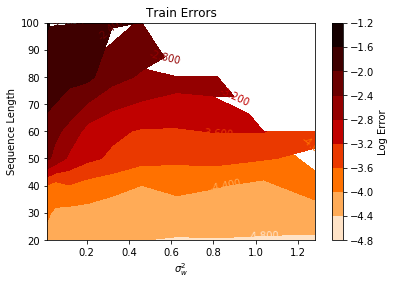

In [21]:
import math
import matplotlib.cm as cm
merged = np.concatenate((err[0:6], losses[1:]), axis=0)
indices = range(len(merged[0]))
indices.sort(key=merged[0].__getitem__)
sorted = np.zeros((len(merged[...,0]), len(merged[0])))
for i in range(len(indices)):
    sorted[...,i] = merged[...,indices[i]]


cmap = cm.get_cmap('gist_heat_r')
cp = plt.contourf(merged[0][1:]**2 *128, merged[...,0][1:], np.log10(merged[...,1:][1:,...]),
                 cmap = cmap)
plt.colorbar(cp).set_label('Log Error')
plt.clabel(cp, inline=True, fontsize = 10)
plt.title("Train Errors")
plt.xlabel(r'$\sigma_w^2$')
plt.ylabel("Sequence Length")
plt.show()